Exercise 1

Give an example of a question we might be able to answer with this sort of data, and another question that we'd need additional data to answer. Assume for now
that all of the reviews are coming from one business.
Answer.

Exercise 2

Conduct an exploratory analysis of the sizes of reviews: find the shortest and longest reviews, then plot a histogram showing the distribution of review lengths.

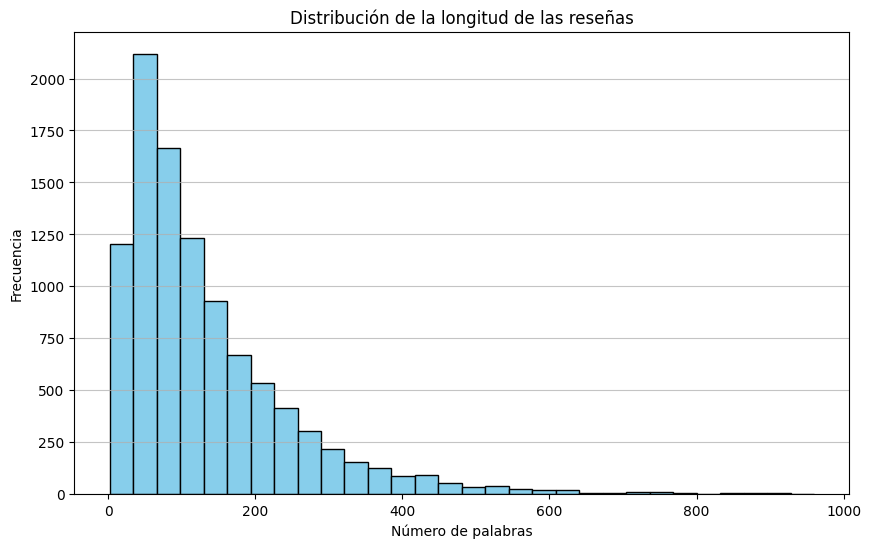

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV y extraer la columna 'text'
data = pd.read_csv('sdata.csv')
reviews = data['text']

# Calcular la longitud de cada reseña en palabras
review_lengths = reviews.apply(lambda x: len(x.split()))

# Identificar la reseña más corta y la más larga
longest_review = reviews[review_lengths.idxmax()]
shortest_review = reviews[review_lengths.idxmin()]

# Visualizar la distribución de la longitud de las reseñas por medio de una grafica de barras
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=30, edgecolor='black', color='skyblue')
plt.title('Distribución de la longitud de las reseñas')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Mostrar la gráfica de barras
plt.show()

Exercise 3

Write a function word_cloud_rating(data, star_value) that constructs a word cloud from the subset of data that exhibit a certain star_value. Visualize the results of
this function for 1-star reviews.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


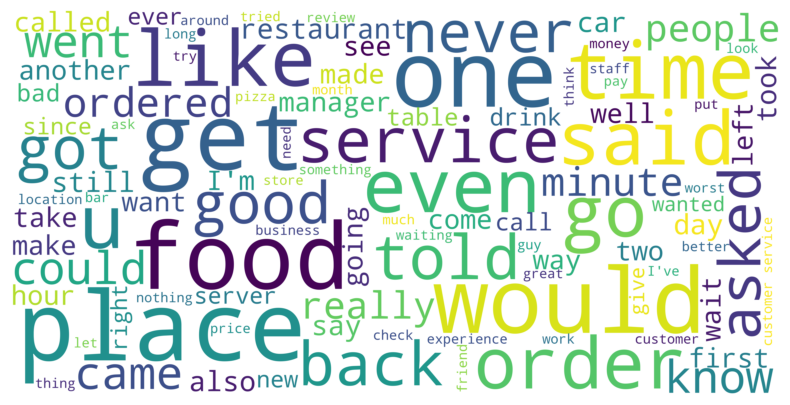

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Función que genera una nube de palabras basada en el número de estrellas de las reseñas
def generate_word_cloud(data, star_rating):
    # Filtrar las reseñas según el número de estrellas
    filtered_reviews = data[data['stars'] == star_rating]
    
    # Unir todas las reseñas en un solo texto
    reviews_text = ' '.join(filtered_reviews['text'].astype(str))

    # Definir las stopwords en inglés
    english_stopwords = set(stopwords.words('english'))
    
    # Generar la nube de palabras
    word_cloud = WordCloud(stopwords=english_stopwords, max_font_size=100, max_words=100, background_color="white", scale=10, width=800, height=400).generate(reviews_text)
    
    # Mostrar la nube de palabras en pantalla
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Cargar el archivo CSV que contiene las reseñas
data = pd.read_csv('sdata.csv')

# Llamar a la función para generar la nube de palabras de las reseñas de 1 estrella
generate_word_cloud(data, 1)

Exercise 4
The word "good" seems to appear quite frequently in the negative reviews. Investigate why that is and come up with a reasonable explanation.

Exercise 5
Find all the high-frequency (top 1%) and low-frequency (bottom 1%) words in the reviews overall. (Hint: import the Counter() function from the collections class.)
Answer.

In [5]:
import pandas as pd
import nltk
from collections import Counter
import numpy as np

# Descargar los paquetes necesarios de NLTK para tokenización y stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# Leer el archivo CSV que contiene las reseñas
data = pd.read_csv('sdata.csv')

# Seleccionar únicamente la columna que contiene el texto de las reseñas
reviews = data['text']

# Convertir todas las reseñas en palabras individuales, ignorando las stopwords
stop_words = set(stopwords.words('english'))

# Unir todo el texto en una sola cadena para facilitar la tokenización
combined_text = ' '.join(reviews.astype(str))

# Dividir el texto en palabras (tokens), eliminando puntuación y stopwords
tokens = nltk.word_tokenize(combined_text.lower())
filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# Contar cuántas veces aparece cada palabra en las reseñas
word_frequencies = Counter(filtered_tokens)

# Sumar el total de palabras para referencia
total_word_count = sum(word_frequencies.values())

# Identificar las palabras más y menos comunes en el 1% superior e inferior
sorted_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Determinar la cantidad de palabras que forman el 1% superior e inferior
top_1_percent_index = int(len(sorted_frequencies) * 0.01)
low_1_percent_index = int(len(sorted_frequencies) * 0.99)

# Extraer las palabras más frecuentes y menos frecuentes
top_1_percent_words = sorted_frequencies[:top_1_percent_index]
low_1_percent_words = sorted_frequencies[low_1_percent_index:]

# Mostrar las palabras más repetidas
print("High-frequency words (Top 1%):")
for word, count in top_1_percent_words:
    print(f"{word}: {count}")

# Mostrar las palabras menos repetidas
print("\nLow-frequency words (Bottom 1%):")
for word, count in low_1_percent_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


High-frequency words (Top 1%):
good: 5781
place: 5605
food: 5398
like: 4550
great: 4432
one: 4080
get: 3748
time: 3699
would: 3659
service: 3340
really: 3274
back: 3112
go: 2942
also: 2918
nice: 2382
well: 2239
us: 2142
little: 2108
ordered: 2017
even: 2016
got: 1967
could: 1959
love: 1949
came: 1829
try: 1807
always: 1784
menu: 1723
order: 1718
chicken: 1685
restaurant: 1676
first: 1671
people: 1659
come: 1649
much: 1638
best: 1629
pretty: 1611
staff: 1597
friendly: 1560
definitely: 1547
never: 1499
make: 1473
delicious: 1468
went: 1446
know: 1431
two: 1430
made: 1407
sauce: 1368
bar: 1338
think: 1318
right: 1315
better: 1283
sure: 1270
way: 1260
experience: 1248
around: 1243
wait: 1240
want: 1235
day: 1226
still: 1225
going: 1204
new: 1200
area: 1185
small: 1182
though: 1172
see: 1170
bit: 1149
since: 1145
everything: 1134
fresh: 1134
take: 1131
night: 1124
said: 1113
lunch: 1108
cheese: 1101
say: 1097
amazing: 1082
salad: 1081
something: 1052
table: 1034
side: 1032
find: 1027
locati

Exercise 6
Write a function called top_k_ngrams(word_tokens, n, k) for printing out the top k n-grams. Use this function to get the top 10 1-grams, 2-grams, and 3-grams from
the first 1000 reviews in our dataset.
Answer.

In [6]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Descargar recursos necesarios para la tokenización y stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Cargar el conjunto de datos y tomar solo una muestra de 1000 reseñas
df = pd.read_csv('sdata.csv', nrows=1000)
texts = df['text']

# Definir las stopwords en inglés y limpiar el texto
stops = set(stopwords.words('english'))
combined_text = ' '.join(texts.astype(str))  # Unir todas las reseñas en un solo texto
tokens = nltk.word_tokenize(combined_text.lower())  # Tokenizar en palabras y convertir a minúsculas
cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stops]  # Filtrar stopwords y caracteres no alfanuméricos

# Función que genera y ordena los n-gramas más frecuentes
def get_ngramas(tokens_limpios, ngram, top_k):
    text = ' '.join(tokens_limpios)  # Convertir los tokens en un solo texto
    vectorizer = CountVectorizer(ngram_range=(ngram, ngram)).fit([text])  # Crear el vectorizador para n-gramas
    bow = vectorizer.transform([text])  # Generar la bolsa de palabras
    frequencies = bow.sum(axis=0)  # Sumar las ocurrencias de cada n-grama
    ngram_freq = [(word, frequencies[0, idx]) for word, idx in vectorizer.vocabulary_.items()]  # Obtener la frecuencia de cada n-grama
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)  # Ordenar de mayor a menor frecuencia
    
    # Mostrar los n-gramas más comunes
    print(f"Top {top_k} {ngram}-grams:")
    for ngram, freq in ngram_freq[:top_k]:
        print(f"{ngram}: {freq}")
    print("\n")

# Obtener los 10 n-gramas más comunes para unigramas, bigramas y trigramas
get_ngramas(cleaned_tokens, 1, 10)  # Unigramas
get_ngramas(cleaned_tokens, 2, 10)  # Bigramas
get_ngramas(cleaned_tokens, 3, 10)  # Trigramas


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 1-grams:
place: 829
good: 715
one: 685
food: 632
like: 592
time: 545
get: 515
would: 455
really: 432
great: 431


Top 10 2-grams:
first time: 55
come back: 47
las vegas: 43
pretty good: 42
next time: 41
food good: 39
feel like: 39
make sure: 38
even though: 37
happy hour: 36


Top 10 3-grams:
wait come back: 11
ca wait come: 10
las vegas strip: 8
give place try: 7
staff friendly helpful: 7
vegas nearly 40: 7
nearly 40 years: 7
half dozen times: 7
maps maps maps: 7
would go back: 6




Exercise 7

7.1
Filter out all of the stop words in the first review of the Yelp review data and print out your answer. Additionally, print out (separately) the stopwords you found in
this review.
Answer.

In [7]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Descargar las listas de palabras vacías (stopwords) y el tokenizador de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Leer las primeras 5000 filas del archivo CSV que contiene las reseñas
df = pd.read_csv('sdata.csv', nrows=5000)

# Extraer la primera reseña del conjunto de datos
review = df['text'][0]

# Tokenizar la reseña: dividir el texto en palabras individuales y convertirlas a minúsculas
tokens = nltk.word_tokenize(review.lower())

# Obtener la lista de palabras vacías en inglés, que no aportan significado (e.g., 'the', 'and', etc.)
stoplist = set(stopwords.words('english'))

# Crear una lista con las palabras que son stopwords en la reseña
found_stopwords = [token for token in tokens if token in stoplist]

# Crear una lista con las palabras que no son stopwords, es decir, las palabras que aportan significado
filtered_tokens = [token for token in tokens if token not in stoplist]

# Imprimir las palabras vacías que se encontraron en la primera reseña
print("Stopwords detected in the first review:")
print(found_stopwords)

# Imprimir la reseña original pero sin las palabras vacías
print("\nFirst review without stopwords:")
print


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stopwords detected in the first review:
['but', 'it', 'been', 'the', 'and', 'they', 'the', 'same', 'they', 'with', 'a', 'and', 'with', 'was', 'very', 'and']

First review without stopwords:


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

7.2
Modify the function top_k_ngrams(word_tokens, n, k) to remove stop words before determining the top n-grams.
Answer.

In [8]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Descargar las stopwords y el tokenizador de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Cargar las palabras vacías (stopwords) en inglés para eliminarlas más adelante
stops = set(stopwords.words('english'))

# Función para obtener los k n-gramas más frecuentes tras eliminar las stopwords
def get_top_ngrams(tokens, n, k):
    # Filtrar las palabras vacías de los tokens
    filtered = [token for token in tokens if token not in stops]
    
    # Convertir los tokens filtrados en una cadena de texto
    joined_text = ' '.join(filtered)
    
    # Inicializar el CountVectorizer para contar los n-gramas (secuencias de palabras de tamaño n)
    vectorizer = CountVectorizer(ngram_range=(n, n))
    
    # Transformar el texto en una matriz de frecuencia de n-gramas
    matrix = vectorizer.fit_transform([joined_text])
    
    # Sumar la frecuencia de cada n-grama
    word_sums = matrix.sum(axis=0)
    
    # Crear una lista de n-gramas junto con sus frecuencias
    freq_list = [(word, word_sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    
    # Ordenar los n-gramas por frecuencia de mayor a menor
    freq_list = sorted(freq_list, key=lambda x: x[1], reverse=True)
    
    # Imprimir los k n-gramas más frecuentes
    print(f"Top {k} {n}-grams without stopwords:")
    for word, count in freq_list[:k]:
        print(f"{word}: {count}")
    print()

# Cargar las primeras 1000 revisiones del archivo CSV en un DataFrame de pandas
df = pd.read_csv('sdata.csv', nrows=1000)

# Extraer la columna 'text' que contiene las reseñas
reviews = df['text']

# Combinar todas las reseñas en una sola cadena de texto
text_data = ' '.join(reviews.astype(str))

# Tokenizar el texto en palabras individuales
tokens = nltk.word_tokenize(text_data.lower())

# Obtener e imprimir los 10 n-gramas más frecuentes de tamaño 1 (unigrama), 2 (bigrama) y 3 (trigrama)
get_top_ngrams(tokens, 1, 10)  # Unigramas
get_top_ngrams(tokens, 2, 10)  # Bigramas
get_top_ngrams(tokens, 3, 10)  # Tr

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 1-grams without stopwords:
place: 829
good: 715
one: 688
food: 637
like: 604
time: 547
get: 516
ve: 501
would: 455
really: 433

Top 10 2-grams without stopwords:
ve never: 61
first time: 55
come back: 48
las vegas: 43
pretty good: 42
next time: 41
ve ever: 39
food good: 39
feel like: 39
make sure: 38

Top 10 3-grams without stopwords:
wait come back: 11
ca wait come: 10
las vegas strip: 8
ll definitely back: 8
ve never seen: 8
give place try: 7
staff friendly helpful: 7
vegas nearly 40: 7
nearly 40 years: 7
half dozen times: 7



Exercise 8

8.1
Divide the data into "good reviews" (i.e. stars rating was greater than 3) and "bad reviews" (i.e. stars rating was less or equal than 3) and make a bar plot of the top
20 words in each case. Are these results different from above?
Answer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


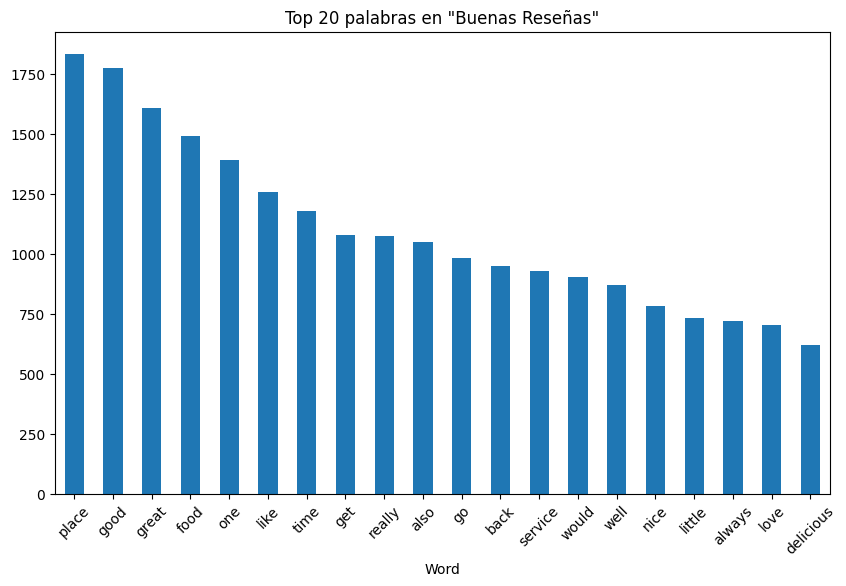

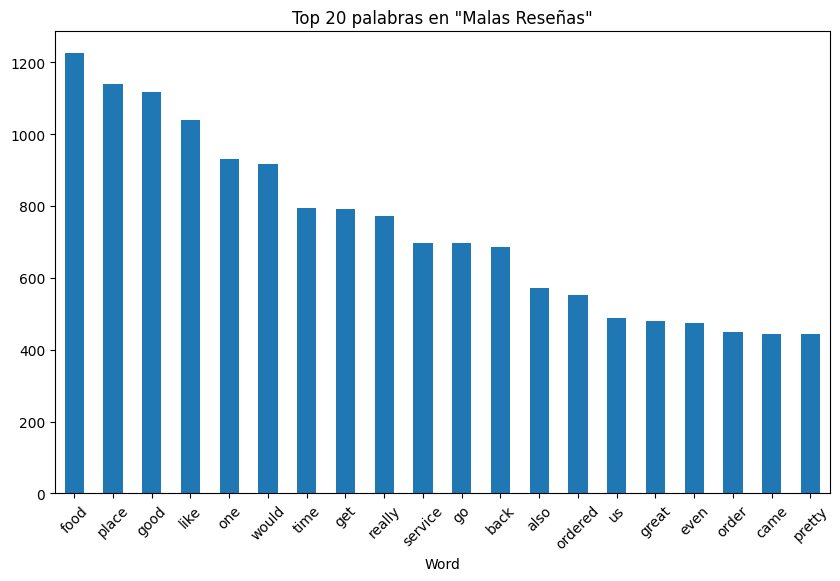

In [9]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Descargar el conjunto de stopwords y el paquete de tokenización de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Cargar los primeros 5000 registros del archivo CSV que contiene las reseñas
data = pd.read_csv('sdata.csv', nrows=5000)

# Obtener las palabras vacías (stopwords) en inglés
stop_words = stopwords.words('english')

# Función para encontrar las palabras más frecuentes en un conjunto de texto
def frequent_words(corpus, n=20):
    # Vectorizar el corpus, eliminando las palabras vacías
    vectorizer = CountVectorizer(stop_words=stop_words).fit(corpus)
    
    # Transformar el corpus en una matriz de frecuencia de términos (Bag of Words)
    bow = vectorizer.transform(corpus)
    
    # Sumar las apariciones de cada palabra en todas las reseñas
    word_totals = bow.sum(axis=0)
    
    # Emparejar cada palabra con su frecuencia total
    word_freq = [(word, word_totals[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    
    # Devolver las 'n' palabras más frecuentes ordenadas de mayor a menor frecuencia
    return sorted(word_freq, key=lambda x: x[1], reverse=True)[:n]

# Filtrar las reseñas con más de 3 estrellas (buenas reseñas)
good_reviews = data[data['stars'] > 3]['text']

# Filtrar las reseñas con 3 estrellas o menos (malas reseñas)
bad_reviews = data[data['stars'] <= 3]['text']

# Obtener las 20 palabras más frecuentes en las buenas reseñas
top_words_good = frequent_words(good_reviews, 20)

# Obtener las 20 palabras más frecuentes en las malas reseñas
top_words_bad = frequent_words(bad_reviews, 20)

# Convertir los resultados a DataFrames para facilidad de manipulación
df_good = pd.DataFrame(top_words_good, columns=['Word', 'Frequency'])
df_bad = pd.DataFrame(top_words_bad, columns=['Word', 'Frequency'])

# Graficar las 20 palabras más comunes en las buenas reseñas
plt.figure(figsize=(10, 6))
df_good.groupby('Word').sum()['Frequency'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 palabras en "Buenas Reseñas"')
plt.xticks(rotation=45)
plt.show()

# Graficar las 20 palabras más comunes en las malas reseñas
plt.figure(figsize=(10, 6))
df_bad.groupby('Word').sum()['Frequency'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 palabras en "Malas Reseñas"')
plt.xticks(rotation=45)
plt.show()

8.2
Use the get_top_n_words() function to find the top 20 bigrams and trigrams (In both, bad and good reviews). Do the results seem useful?
Answer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


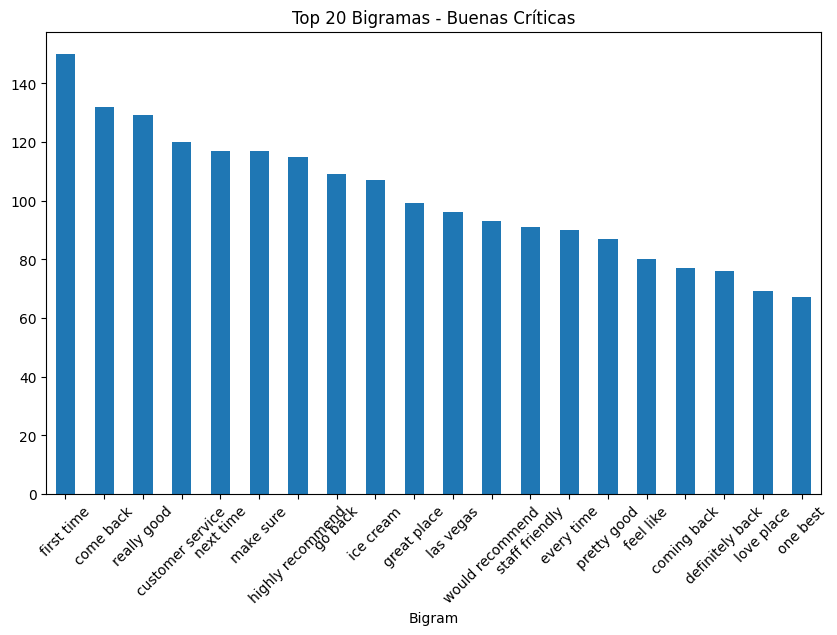

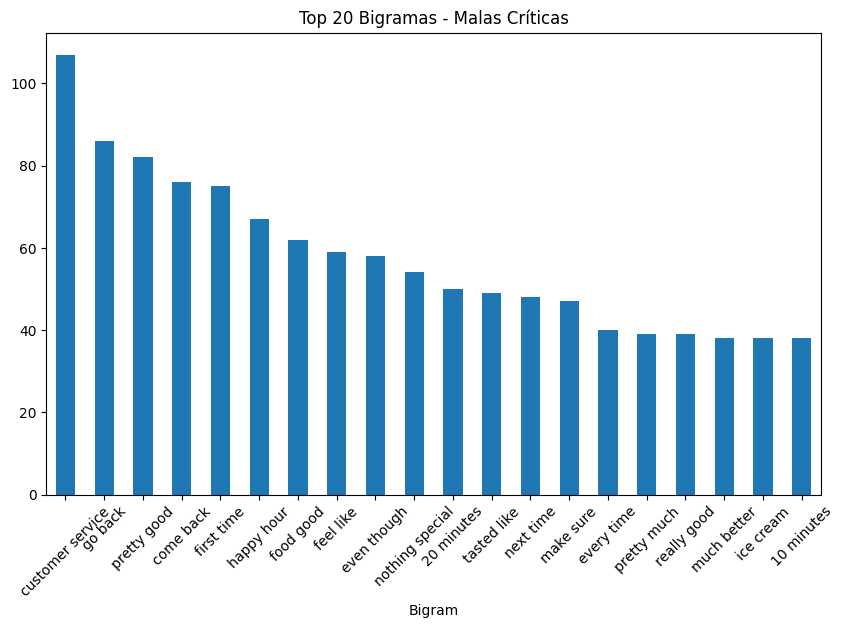

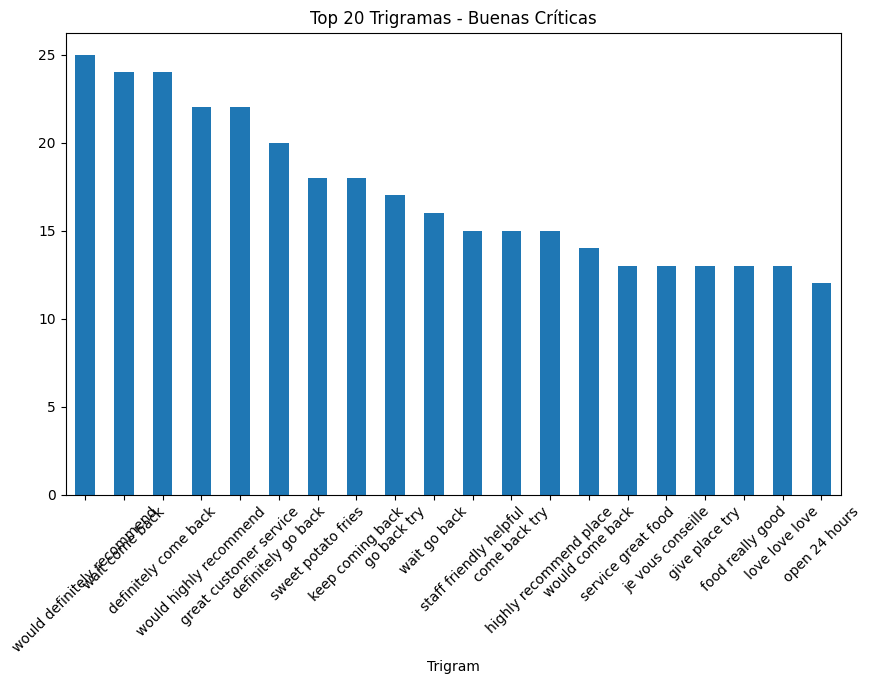

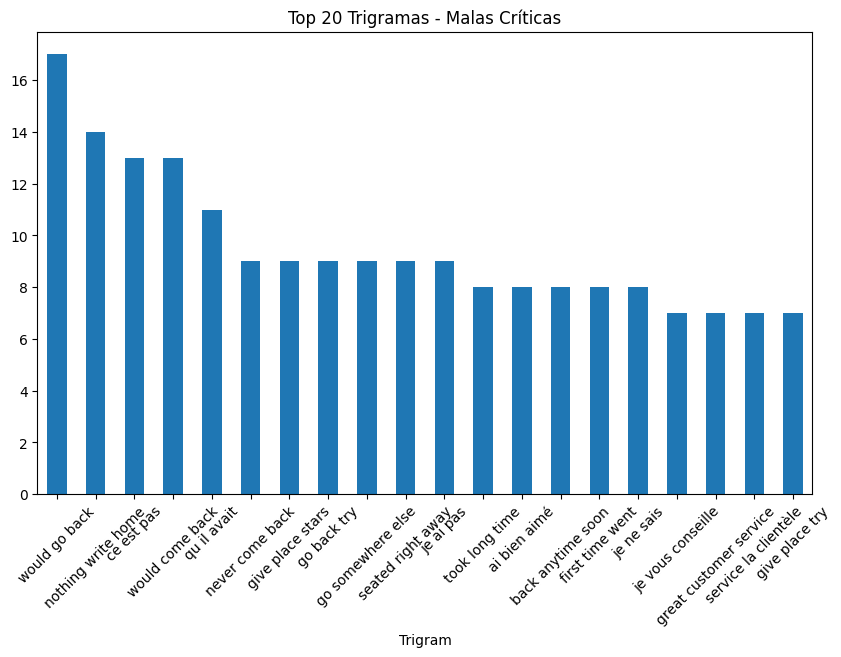

In [10]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Descargamos los recursos necesarios de NLTK para manejar el corpus de palabras vacías y la tokenización de textos.
nltk.download('stopwords')
nltk.download('punkt')

# Leemos el archivo CSV con las primeras 5000 reseñas. Este archivo contiene texto y el número de estrellas asignadas por los usuarios.
data = pd.read_csv('sdata.csv', nrows=5000)

# Obtenemos una lista de las stopwords en inglés para usarlas en la limpieza del texto. Estas son palabras comunes como "the", "is", "at", etc.
stop_words = stopwords.words('english')

# Función que genera los n-gramas más frecuentes en un corpus. 
# Un n-grama es una secuencia de n palabras consecutivas que aparecen juntas en un texto. 
# Se ajusta para buscar bigramas, trigramas o cualquier n-grama según el parámetro `ngram_range`.
def get_most_frequent_ngrams(corpus, n=20, ngram_range=(1, 1)):
    # Se crea un vectorizador que convierte el texto en una matriz de conteo de n-gramas,
    # eliminando las palabras vacías definidas previamente.
    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)
    
    # Transformamos el corpus de texto a una matriz de conteo de palabras (bag-of-words).
    bow_matrix = vectorizer.fit_transform(corpus)
    
    # Sumamos la cantidad de veces que cada palabra o n-grama aparece en el corpus.
    total_words = bow_matrix.sum(axis=0)
    
    # Se genera una lista de tuplas que contiene el n-grama y su frecuencia en el corpus.
    word_freq = [(word, total_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    
    # Ordenamos las tuplas por frecuencia en orden descendente, retornando los `n` más comunes.
    return sorted(word_freq, key=lambda x: x[1], reverse=True)[:n]

# Filtramos las reseñas de "buenas" (más de 3 estrellas) y "malas" (3 estrellas o menos) para compararlas.
positive_reviews = data[data['stars'] > 3]['text']
negative_reviews = data[data['stars'] <= 3]['text']

# Llamamos a la función para obtener los 20 bigramas más comunes en las reseñas positivas.
bigrams_pos = get_most_frequent_ngrams(positive_reviews, 20, ngram_range=(2, 2))

# Llamamos a la función para obtener los 20 bigramas más comunes en las reseñas negativas.
bigrams_neg = get_most_frequent_ngrams(negative_reviews, 20, ngram_range=(2, 2))

# Realizamos la misma operación para trigramas: se obtienen los 20 trigramas más comunes en reseñas positivas.
trigrams_pos = get_most_frequent_ngrams(positive_reviews, 20, ngram_range=(3, 3))

# Y los trigramas más comunes en las reseñas negativas.
trigrams_neg = get_most_frequent_ngrams(negative_reviews, 20, ngram_range=(3, 3))

# Creamos DataFrames para facilitar la visualización de los bigramas más comunes en reseñas positivas y negativas.
df_bigrams_pos = pd.DataFrame(bigrams_pos, columns=['Bigram', 'Frequency'])
df_bigrams_neg = pd.DataFrame(bigrams_neg, columns=['Bigram', 'Frequency'])
df_trigrams_pos = pd.DataFrame(trigrams_pos, columns=['Trigram', 'Frequency'])
df_trigrams_neg = pd.DataFrame(trigrams_neg, columns=['Trigram', 'Frequency'])

# Gráfica de los 20 bigramas más comunes en reseñas positivas.
plt.figure(figsize=(10, 6))
df_bigrams_pos.groupby('Bigram').sum()['Frequency'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 Bigramas - Buenas Críticas')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mayor legibilidad.
plt.show()

# Gráfica de los 20 bigramas más comunes en reseñas negativas.
plt.figure(figsize=(10, 6))
df_bigrams_neg.groupby('Bigram').sum()['Frequency'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 Bigramas - Malas Críticas')
plt.xticks(rotation=45)
plt.show()

# Gráfica de los 20 trigramas más comunes en reseñas positivas.
plt.figure(figsize=(10, 6))
df_trigrams_pos.groupby('Trigram').sum()['Frequency'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 Trigramas - Buenas Críticas')
plt.xticks(rotation=45)
plt.show()

# Gráfica de los 20 trigramas más comunes en reseñas negativas.
plt.figure(figsize=(10, 6))
df_trigrams_neg.groupby('Trigram').sum()['Frequency'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 Trigramas - Malas Críticas')
plt.xticks(rotation=45)
plt.show()

eee